# Descriptive Statistics

This file provides descriptive statistics and visualizations of the main variables.

In [1]:
import pandas as pd

In [2]:
bb = pd.read_csv('bbNoText.csv')

# Describe the data rounded to two decimals
bb.describe().round(3)

,Year,District,econ_index,econ_index_change,econ_index_change_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
count,4326.000,4326.000,4326.000,4314.000,4326.000,4326.000,4326.000,4326.000,4326.000,4326.000
mean,2001.088,6.501,88.473,0.688,0.844,0.864,0.127,0.089,0.443,0.123
std,13.019,3.451,27.208,23.339,0.363,0.452,0.081,0.120,0.108,0.166
min,1979.000,1.000,2.486,-29.794,0.000,-0.998,-0.198,-0.270,0.000,-0.695
25%,1990.000,4.000,65.500,0.138,1.000,0.987,0.075,0.000,0.382,0.000
50%,2001.000,6.500,88.488,0.327,1.000,0.996,0.131,0.000,0.440,0.111
75%,2012.000,9.000,103.911,0.559,1.000,0.998,0.182,0.178,0.510,0.236
max,2024.000,12.000,164.075,1529.295,1.000,1.000,0.401,0.527,0.994,0.704


In [3]:
# sort by 'District' and 'Year'
bb_sorted = bb.sort_values(by=['District', 'Year'])

# Selecting columns I want stats for
selected_columns = ['econ_index', 'econ_index_change', 'econ_index_change_dummy', 'compound_score', 'mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram']
# Descriptive statistics by District
district_stats = bb_sorted.groupby('District')[selected_columns].describe()

# Descriptive statistics by Year
year_stats = bb_sorted.groupby('Year')[selected_columns].describe()


In [4]:
bb_sorted.groupby('District')['econ_index_change_dummy'].describe()


,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
1,359.0,0.810585,0.392385,0.0,1.0,1.0,1.0,1.0
2,361.0,0.808864,0.393741,0.0,1.0,1.0,1.0,1.0
3,360.0,0.822222,0.382858,0.0,1.0,1.0,1.0,1.0
4,361.0,0.783934,0.412131,0.0,1.0,1.0,1.0,1.0
5,361.0,0.875346,0.330784,0.0,1.0,1.0,1.0,1.0
6,361.0,0.880886,0.324372,0.0,1.0,1.0,1.0,1.0
7,361.0,0.795014,0.404252,0.0,1.0,1.0,1.0,1.0
8,360.0,0.819444,0.385185,0.0,1.0,1.0,1.0,1.0
9,361.0,0.844875,0.362526,0.0,1.0,1.0,1.0,1.0


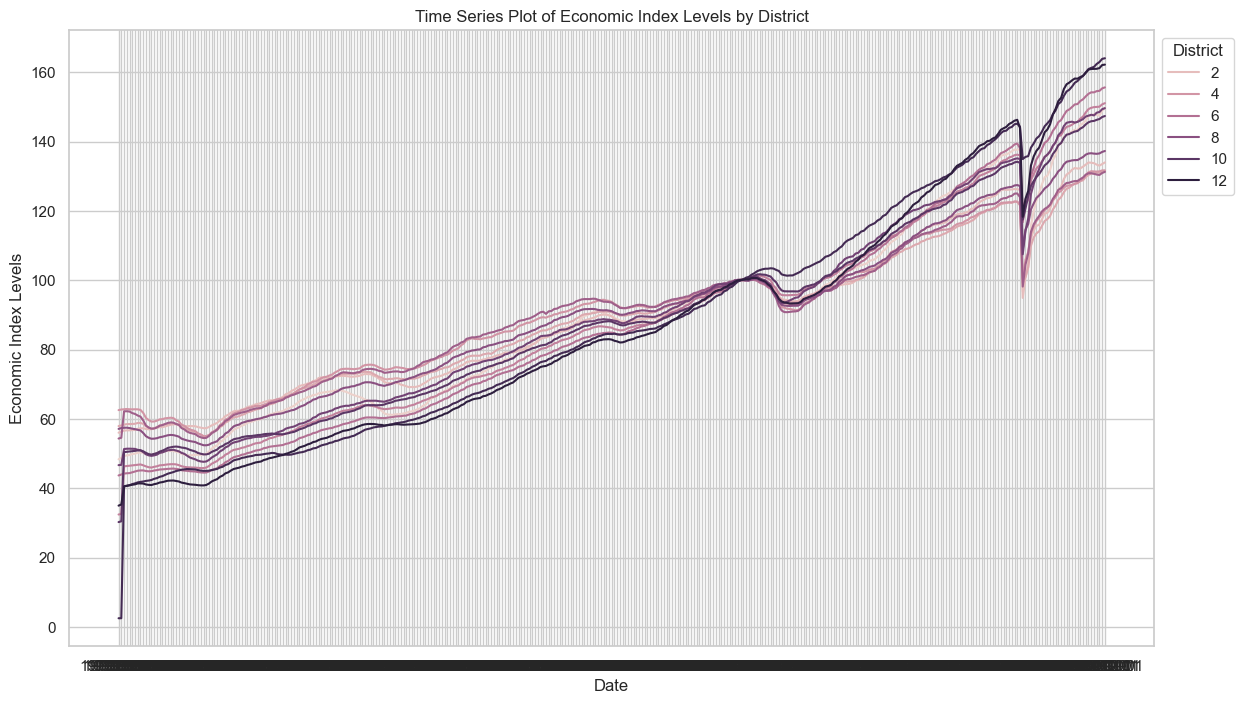

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'bb' and has a 'Date' column
# and a 'District' column among others

# Sort the DataFrame by the 'Date' column
bb_sorted_by_date = bb.sort_values(by='Date')

# Set the plotting style (optional, but can enhance visual appeal)
sns.set(style="whitegrid")

# Create a time series plot for each district
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='econ_index', hue='District', data=bb_sorted_by_date)
plt.title('Time Series Plot of Economic Index Levels by District')
plt.xlabel('Date')
plt.ylabel('Economic Index Levels')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [7]:
predictors = ['compound_score', 'mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram']
DVs = ['USPHCI', 'econ_index_change_dummy', 'econ_index', 'econ_index_change']


In [8]:
bb[predictors].describe()

,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
count,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000
mean,0.864299,0.127464,0.089174,0.443471,0.122998
std,0.452309,0.081495,0.119710,0.108040,0.166198
min,-0.998400,-0.197844,-0.270000,0.000000,-0.695000
25%,0.987200,0.075278,0.000000,0.381800,0.000000
50%,0.996200,0.131433,0.000000,0.440400,0.111392
75%,0.998300,0.182009,0.177900,0.509800,0.236367
max,0.999900,0.401186,0.526700,0.994250,0.704417


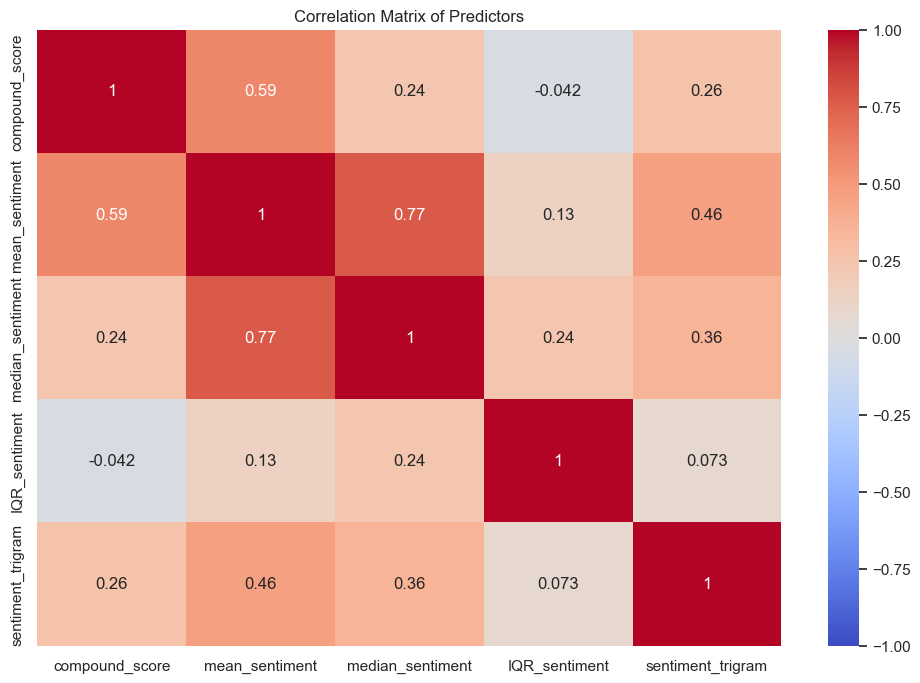

In [9]:
# Correlations between predictors
bb[predictors].corr()

# Create a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(bb[predictors].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Predictors')
plt.show()

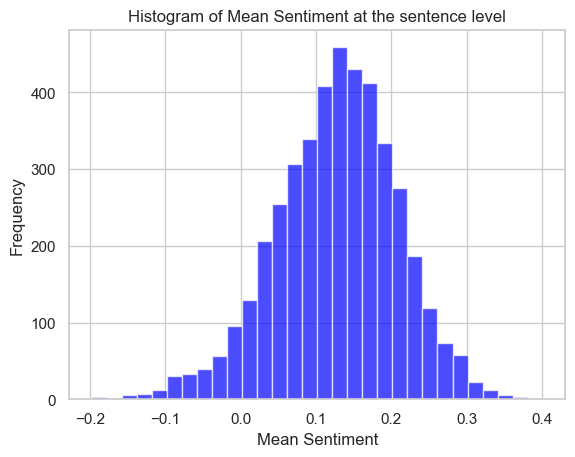

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'mean_sentiment' column
plt.hist(bb['mean_sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Mean Sentiment at the sentence level')
plt.xlabel('Mean Sentiment')
plt.ylabel('Frequency')
plt.show()


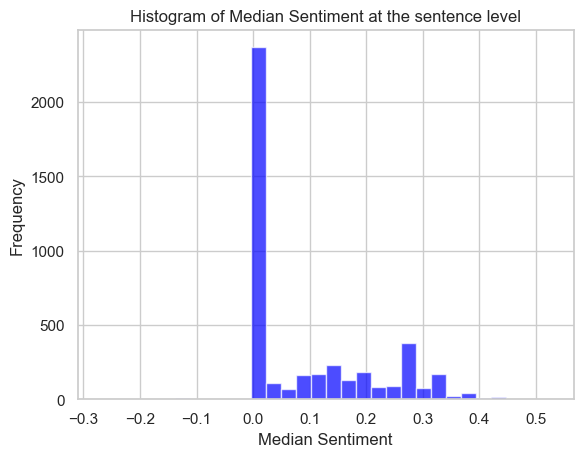

In [11]:
# Plot a histogram for the 'median_sentiment' column
plt.hist(bb['median_sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Median Sentiment at the sentence level')
plt.xlabel('Median Sentiment')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Count the occurrences where 'median_sentiment' is equal to 0
count_median_sentiment_zero = (bb['median_sentiment'] == 0).sum()

# Print the result
print(f"The number of times 'median_sentiment' equals 0 is: {count_median_sentiment_zero}")


The number of times 'median_sentiment' equals 0 is: 2356


In [13]:
# Count the occurrences where 'trigram' is equal to 0
count_sentiment_trigram_zero = (bb['sentiment_trigram'] == 0).sum()

# Print the result
print(f"The number of times none of the 43 key trigrams are found in the document is: {count_sentiment_trigram_zero}")



The number of times none of the 43 key trigrams are found in the document is: 820


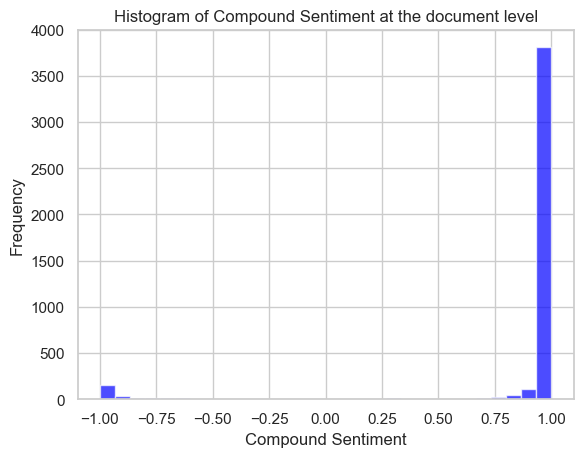

In [14]:
# Plot a histogram for the 'compound_score' column
plt.hist(bb['compound_score'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Compound Sentiment at the document level')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.show()

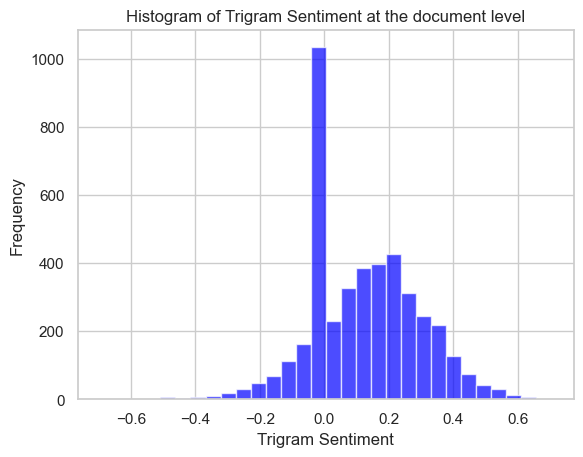

In [15]:
# Plot a histogram for the 'sentiment_trigram' column
plt.hist(bb['sentiment_trigram'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Trigram Sentiment at the document level')
plt.xlabel('Trigram Sentiment')
plt.ylabel('Frequency')
plt.show()

In [16]:
correlation_predictors = ['compound_score', 'mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram']

# Create a correlation matrix
correlation_table = bb[correlation_predictors].corr()

# Print or display the correlation table
print("Correlation Table:")
correlation_table

Correlation Table:


,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
compound_score,1.000000,0.588681,0.238615,-0.042424,0.263534
mean_sentiment,0.588681,1.000000,0.772002,0.133347,0.462261
median_sentiment,0.238615,0.772002,1.000000,0.238147,0.357261
IQR_sentiment,-0.042424,0.133347,0.238147,1.000000,0.073301
sentiment_trigram,0.263534,0.462261,0.357261,0.073301,1.000000


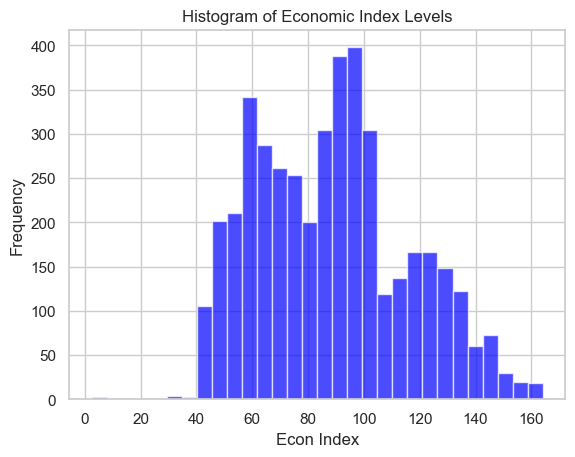

In [17]:
# Plot a histogram for the 'econ_index' column
plt.hist(bb['econ_index'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Economic Index Levels')
plt.xlabel('Econ Index')
plt.ylabel('Frequency')
plt.show()

# Word counts

In [18]:
import pandas as pd
bbText = pd.read_csv('bbText.csv')

# Count words per document
bbText['word_count'] = bbText['text'].apply(lambda x: len(x.split()))

In [19]:
# Set display option to prevent scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

bbText.describe()

,District,econ_index,compound_score,Year,MonthCode,MonthNumerical,mean_sentiment,median_sentiment,25th_quartile_sentiment,50th_quartile_sentiment,75th_quartile_sentiment,econ_index_dummy,IQR_sentiment,sentiment_trigram,econ_index_change,econ_index_change_dummy,word_count
count,"4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,326.00","4,314.00","4,326.00","4,326.00"
mean,6.50,88.47,0.86,"2,001.09",4.51,6.61,0.13,0.09,-0.06,0.08,0.38,1.00,0.44,0.12,0.69,0.84,"1,024.97"
std,3.45,27.21,0.45,13.02,2.30,3.44,0.08,0.12,0.10,0.12,0.11,0.00,0.11,0.17,23.34,0.36,239.53
min,1.00,2.49,-1.00,"1,979.00",1.00,1.00,-0.20,-0.27,-0.58,-0.27,0.00,1.00,0.00,-0.70,-29.79,0.00,347.00
25%,4.00,65.50,0.99,"1,990.00",3.00,3.00,0.08,0.00,-0.12,0.00,0.32,1.00,0.38,0.00,0.14,1.00,831.00
50%,6.50,88.49,1.00,"2,001.00",5.00,6.00,0.13,0.00,0.00,0.00,0.38,1.00,0.44,0.11,0.33,1.00,"1,011.50"
75%,9.00,103.91,1.00,"2,012.00",7.00,9.00,0.18,0.18,0.00,0.17,0.45,1.00,0.51,0.24,0.56,1.00,"1,193.00"
max,12.00,164.07,1.00,"2,024.00",8.00,12.00,0.40,0.53,0.32,0.48,0.79,1.00,0.99,0.70,"1,529.30",1.00,"2,195.00"


(array([  1.,   2.,   6.,  27.,  97., 245., 377., 384., 379., 350., 364.,
        340., 354., 417., 366., 238.,  97.,  81.,  63.,  48.,  40.,  27.,
         13.,   3.,   5.,   0.,   1.,   0.,   0.,   1.]),
 array([ 347. ,  408.6,  470.2,  531.8,  593.4,  655. ,  716.6,  778.2,
         839.8,  901.4,  963. , 1024.6, 1086.2, 1147.8, 1209.4, 1271. ,
        1332.6, 1394.2, 1455.8, 1517.4, 1579. , 1640.6, 1702.2, 1763.8,
        1825.4, 1887. , 1948.6, 2010.2, 2071.8, 2133.4, 2195. ]),
 <BarContainer object of 30 artists>)

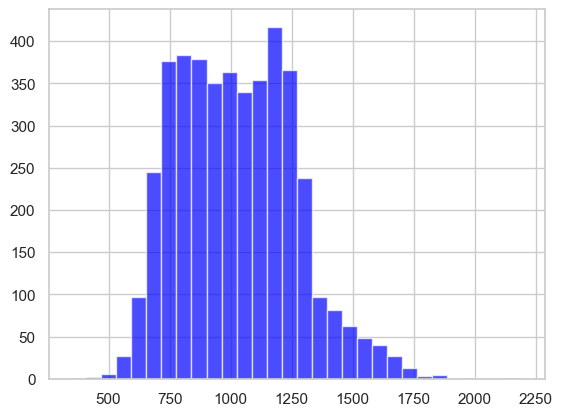

In [20]:
# Plot histogram of word counts
import matplotlib.pyplot as plt
plt.hist(bbText['word_count'], bins=30, color='blue', alpha=0.7)

In [21]:
# Describe word count by district
bbText.groupby('District')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
1,359.00,"1,088.77",328.87,475.00,773.50,"1,046.00","1,323.50","1,956.00"
2,361.00,"1,032.53",185.28,574.00,907.00,"1,028.00","1,183.00","1,534.00"
3,360.00,"1,039.87",217.79,564.00,866.75,"1,028.50","1,193.50","1,721.00"
4,361.00,"1,061.37",247.88,599.00,854.00,"1,064.00","1,239.00","1,649.00"
5,361.00,"1,084.83",317.00,554.00,767.00,"1,141.00","1,306.00","1,729.00"
6,361.00,957.05,176.34,556.00,824.00,911.00,"1,119.00","1,413.00"
7,361.00,"1,114.72",148.02,741.00,"1,003.00","1,114.00","1,219.00","1,595.00"
8,360.00,873.15,181.02,423.00,721.00,847.50,"1,003.25","1,289.00"
9,361.00,"1,041.46",209.00,347.00,879.00,"1,097.00","1,202.00","1,379.00"


<Axes: xlabel='Month'>

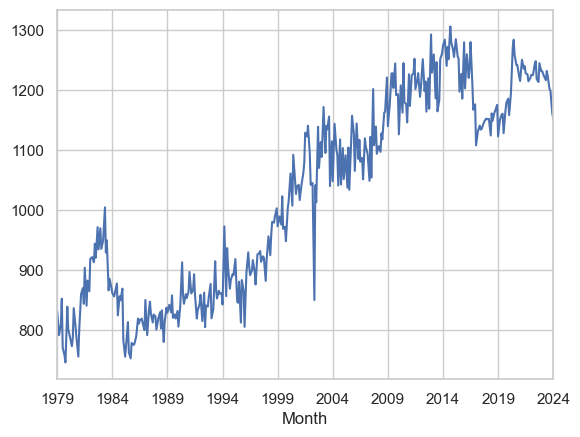

In [22]:
# plot average word counts by month for all districts over time
bbText['Date'] = pd.to_datetime(bbText['Date'])
bbText['Month'] = bbText['Date'].dt.to_period('M')
bbText.groupby('Month')['word_count'].mean().plot()


In [23]:
# Calculate average word count for 1970s, 1980s, 1990s, and 2000s, 2010s, and 2020s
bbText['Decade'] = bbText['Date'].dt.year // 10 * 10
bbText.groupby('Decade')['word_count'].mean()

Decade
1970     800.05
1980     842.56
1990     893.48
2000   1,100.66
2010   1,202.17
2020   1,224.65
Name: word_count, dtype: float64

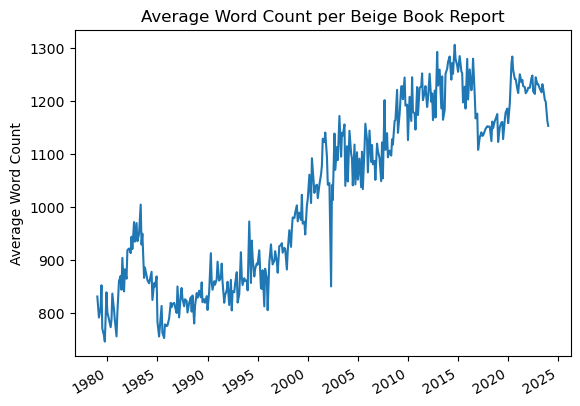

In [15]:
# Plot average word counts per Beige Book report averaged across all districts
bbText.groupby('Date')['word_count'].mean().plot()
# Remove x label
plt.xlabel('')
plt.ylabel('Average Word Count')
plt.title('Average Word Count per Beige Book Report')

# Export as png
plt.savefig('word_count.png')
plt.show()
